In [1]:
import sys; print(sys.version)
import numpy; print(numpy.__version__)
import scipy; print(scipy.__version__)
import sklearn; print(sklearn.__version__)
import pandas; print(pandas.__version__)
import statsmodels; print(statsmodels.__version__)
import pip; print(pip.__version__)


3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
1.15.4
1.2.2
0.21.2
0.25.1
0.9.0
19.2.3


In [2]:
# Import Packages

import pandas as pd
import numpy as np

In [3]:
# To plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
# normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [6]:
# Read the Data File

df = pd.read_csv("D:/ML/Stock Prediction Problem/FCPO3-OHLCV.csv")
df.head()

,Date,Open,High,Low,Close,Total Trade Quantity
0,2000-01-04,1151,1152,1139,1141,753
1,2000-01-05,1145,1148,1131,1135,306
2,2000-01-06,1139,1147,1135,1145,404
3,2000-01-07,1139,1147,1135,1145,404
4,2000-01-10,1139,1147,1135,1145,404


In [7]:
#setting index as date

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


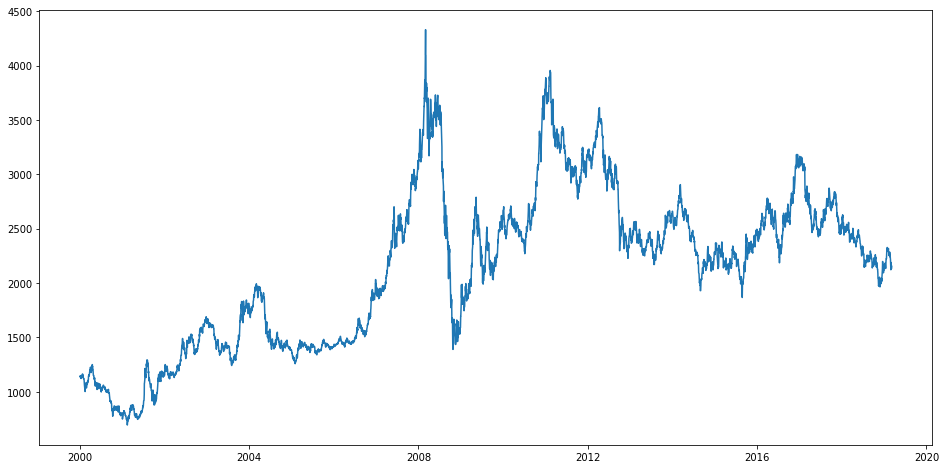

In [8]:
# Plot

plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price History')

In [9]:
#creating dataframe with date and the target variable

df.head()    

,Date,Open,High,Low,Close,Total Trade Quantity
Date,,,,,,
2000-01-04,2000-01-04,1151,1152,1139,1141,753
2000-01-05,2000-01-05,1145,1148,1131,1135,306
2000-01-06,2000-01-06,1139,1147,1135,1145,404
2000-01-07,2000-01-07,1139,1147,1135,1145,404
2000-01-10,2000-01-10,1139,1147,1135,1145,404


In [10]:
data = df.sort_index(ascending=True, axis=0)

In [11]:
data.head()

,Date,Open,High,Low,Close,Total Trade Quantity
Date,,,,,,
2000-01-04,2000-01-04,1151,1152,1139,1141,753
2000-01-05,2000-01-05,1145,1148,1131,1135,306
2000-01-06,2000-01-06,1139,1147,1135,1145,404
2000-01-07,2000-01-07,1139,1147,1135,1145,404
2000-01-10,2000-01-10,1139,1147,1135,1145,404


In [12]:
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

In [13]:
new_data.head()

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [14]:
for i in range(0, len(data)):
    new_data['Date'][i]= data['Date'][i]
    new_data['Close'][i]=data['Close'][i]

In [15]:
new_data.head()

,Date,Close
0,2000-01-04 00:00:00,1141
1,2000-01-05 00:00:00,1135
2,2000-01-06 00:00:00,1145
3,2000-01-07 00:00:00,1145
4,2000-01-10 00:00:00,1145


In [16]:
len(data)

5003

In [17]:
#splitting into train and validation

train = new_data[:4002]
valid = new_data[4002:]

In [18]:
train.head()

,Date,Close
0,2000-01-04 00:00:00,1141
1,2000-01-05 00:00:00,1135
2,2000-01-06 00:00:00,1145
3,2000-01-07 00:00:00,1145
4,2000-01-10 00:00:00,1145


In [19]:
new_data.shape,train.shape,valid.shape

((5003, 2), (4002, 2), (1001, 2))

In [20]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2000-01-04 00:00:00'),
 Timestamp('2015-05-06 00:00:00'),
 Timestamp('2015-05-07 00:00:00'),
 Timestamp('2019-03-07 00:00:00'))

In [21]:
# Make predictions

preds = []

for i in range(0, 1001):
    a = train['Close'][len(train)-1001+i:].sum() + sum(preds)
    b = a/1001
    preds.append(b)

In [22]:
preds

[2613.927072927073,
 2613.5124146582684,
 2613.0713681194657,
 2612.6079029527523,
 2612.14797078787,
 2611.726540189256,
 2611.256736533102,
 2610.724525480687,
 2610.218755775873,
 2609.7514418455785,
 2609.254690039231,
 2608.711487931378,
 2608.1907201870536,
 2607.6594421852424,
 2607.167593476137,
 2606.656272390698,
 2606.133451483996,
 2605.6240942926706,
 2605.1342082729834,
 2604.6188578316974,
 2604.109985561799,
 2603.5796259070157,
 2603.082702456373,
 2602.635232628658,
 2602.24425883508,
 2601.926820532218,
 2601.5920820911906,
 2601.201065190183,
 2600.7876796409228,
 2600.31893606414,
 2599.9176562799885,
 2599.4850065859628,
 2599.058917681453,
 2598.6553801366795,
 2598.232458438514,
 2597.763160195196,
 2597.325361154432,
 2596.929082793947,
 2596.5513895699646,
 2596.1393529961088,
 2595.7269047973036,
 2595.3140445623358,
 2594.9007718795806,
 2594.446127296044,
 2594.022996554082,
 2593.632410137053,
 2593.18449046686,
 2592.7531063414526,
 2592.296316237898,
 25

In [23]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))

In [24]:
rms

295.0033583319099

C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


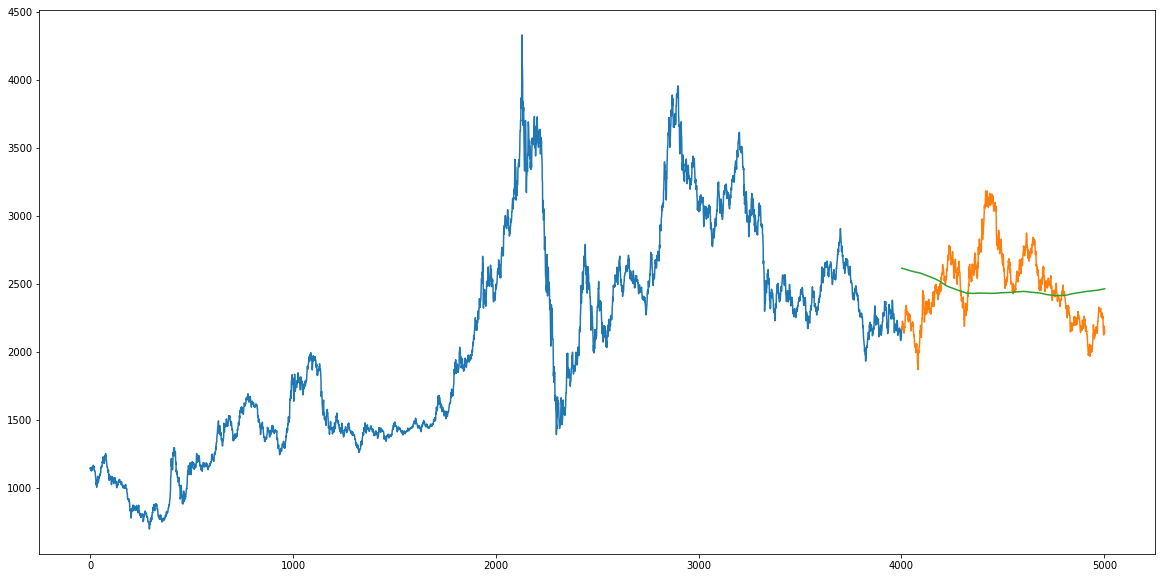

In [25]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [26]:
# Linear Regression Implementation

#Create new Data Set

#setting index as date values

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [27]:
new_data.head()

,Date,Close
0,2000-01-04 00:00:00,1141
1,2000-01-05 00:00:00,1135
2,2000-01-06 00:00:00,1145
3,2000-01-07 00:00:00,1145
4,2000-01-10 00:00:00,1145


In [28]:
import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [29]:
add_datepart(new_data, 'Date')

In [30]:
new_data.drop('Elapsed', axis=1, inplace=True)

In [31]:
new_data

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1141,2000,1,1,4,1,4,False,False,False,False,False,False
1,1135,2000,1,1,5,2,5,False,False,False,False,False,False
2,1145,2000,1,1,6,3,6,False,False,False,False,False,False
3,1145,2000,1,1,7,4,7,False,False,False,False,False,False
4,1145,2000,1,2,10,0,10,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,2189,2019,3,9,1,4,60,False,True,False,False,False,False
4999,2149,2019,3,10,4,0,63,False,False,False,False,False,False
5000,2160,2019,3,10,5,1,64,False,False,False,False,False,False
5001,2157,2019,3,10,6,2,65,False,False,False,False,False,False


In [41]:
#split into train and validation
train = new_data[:1000]
valid = new_data[1000:]

In [42]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [43]:
train.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1141,2000,1,1,4,1,4,False,False,False,False,False,False
1,1135,2000,1,1,5,2,5,False,False,False,False,False,False
2,1145,2000,1,1,6,3,6,False,False,False,False,False,False
3,1145,2000,1,1,7,4,7,False,False,False,False,False,False
4,1145,2000,1,2,10,0,10,False,False,False,False,False,False


In [44]:
x_train.head()

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2000,1,1,4,1,4,False,False,False,False,False,False
1,2000,1,1,5,2,5,False,False,False,False,False,False
2,2000,1,1,6,3,6,False,False,False,False,False,False
3,2000,1,1,7,4,7,False,False,False,False,False,False
4,2000,1,2,10,0,10,False,False,False,False,False,False


In [45]:
y_train.shape

(1000,)

In [46]:
#implement linear regression

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(x_train, y_train)



from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1045.2440388099906

In [38]:
# k-Nearest Neighbours

# Importing libraries

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.000000,0.100000,0.25,0.008219,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.133333,0.50,0.010959,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.166667,0.75,0.013699,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.200000,1.00,0.016438,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.019231,0.300000,0.00,0.024658,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

875.9713943228336

C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


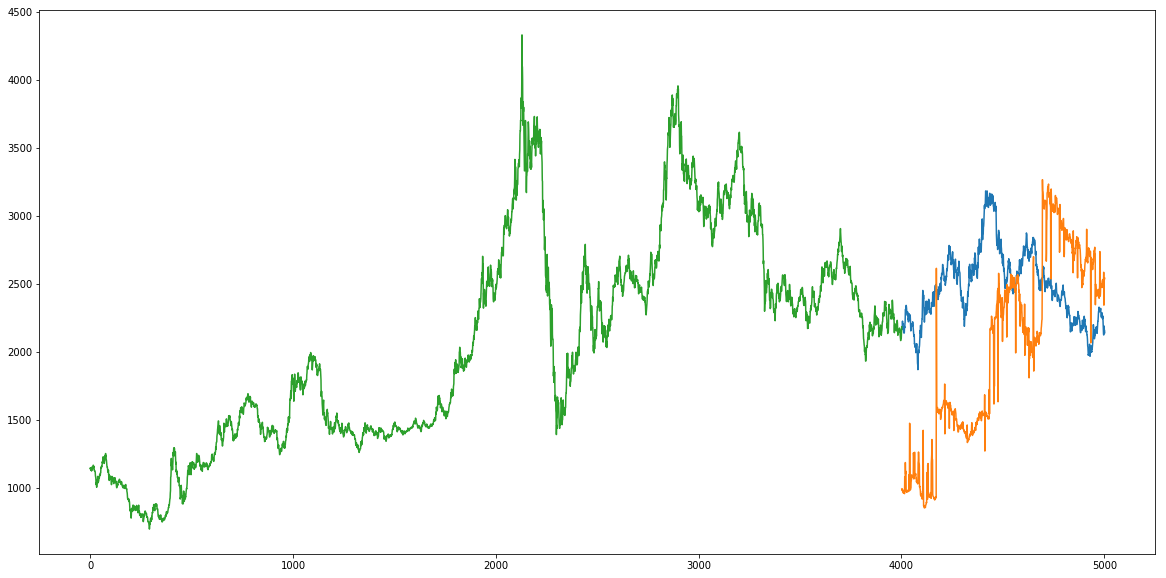

In [42]:
# plot

valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])


In [43]:
# Auto Arima

from pmdarima.arima import auto_arima

In [44]:
data = df.sort_index(ascending=True, axis=0)


In [45]:
train = data[:4002]
valid = data[4002:]

In [46]:
train.head()

,Date,Open,High,Low,Close,Total Trade Quantity
Date,,,,,,
2000-01-04,2000-01-04,1151,1152,1139,1141,753
2000-01-05,2000-01-05,1145,1148,1131,1135,306
2000-01-06,2000-01-06,1139,1147,1135,1145,404
2000-01-07,2000-01-07,1139,1147,1135,1145,404
2000-01-10,2000-01-10,1139,1147,1135,1145,404


In [47]:
valid.head()

,Date,Open,High,Low,Close,Total Trade Quantity
Date,,,,,,
2015-05-07,2015-05-07,2167,2179,2161,2173,15702
2015-05-08,2015-05-08,2154,2163,2141,2162,17931
2015-05-11,2015-05-11,2182,2196,2170,2195,17684
2015-05-12,2015-05-12,2199,2230,2195,2224,24106
2015-05-13,2015-05-13,2216,2233,2193,2198,19749


In [48]:
training = train['Close']
validation = valid['Close']

In [49]:
validation.head()

Date
2015-05-07    2173
2015-05-08    2162
2015-05-11    2195
2015-05-12    2224
2015-05-13    2198
Name: Close, dtype: int64

In [50]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=40056.687, BIC=40088.143, Fit time=14.754 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=42790.477, BIC=42803.059, Fit time=0.296 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=41632.799, BIC=41657.964, Fit time=5.844 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=40055.788, BIC=40080.953, Fit time=11.951 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=40057.478, BIC=40088.935, Fit time=10.061 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=42790.059, BIC=42808.933, Fit time=0.621 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=40057.493, BIC=40088.950, Fit time=30.534 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=40058.910, BIC=40096.657, Fit time=42.015 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=40053.790, BIC=40072.664, Fit time=9.467 seconds
Fit A

In [51]:
model.fit(training)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [52]:
forecast = model.predict(n_periods=1001)

In [53]:
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [54]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

574.3998536796187

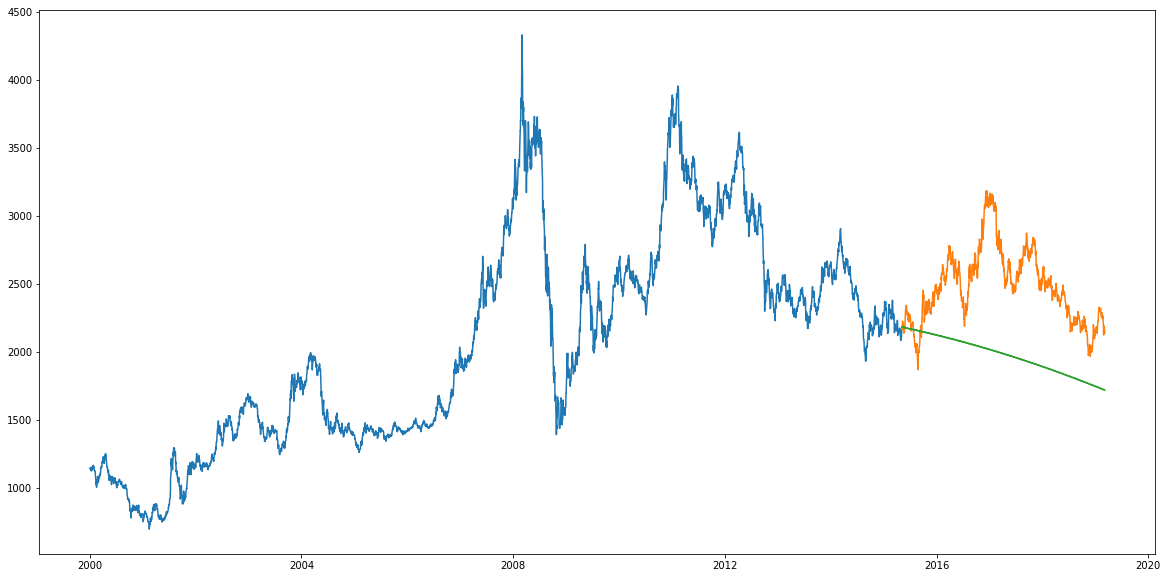

In [55]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [56]:
#importing prophet
from fbprophet import Prophet


In [57]:
# Creating a dataframe 

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [58]:
new_data.head()

,Date,Close
Date,,
2000-01-04,2000-01-04,1141
2000-01-05,2000-01-05,1135
2000-01-06,2000-01-06,1145
2000-01-07,2000-01-07,1145
2000-01-10,2000-01-10,1145


In [59]:
#preparing data

new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [60]:
new_data.head()

,ds,y
Date,,
2000-01-04,2000-01-04,1141
2000-01-05,2000-01-05,1135
2000-01-06,2000-01-06,1145
2000-01-07,2000-01-07,1145
2000-01-10,2000-01-10,1145


In [61]:
#train and validation
train = new_data[:4002]
valid = new_data[4002:]

In [62]:
# fit the model

model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [63]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))

In [64]:
forecast = model.predict(close_prices)

In [65]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-04,1135.662683,975.646509,1432.672384,1135.662683,1135.662683,68.825939,68.825939,68.825939,2.622713,2.622713,2.622713,66.203226,66.203226,66.203226,0.0,0.0,0.0,1204.488622
1,2000-01-05,1134.773970,986.656241,1445.193611,1134.773970,1134.773970,71.165031,71.165031,71.165031,3.731304,3.731304,3.731304,67.433727,67.433727,67.433727,0.0,0.0,0.0,1205.939001
2,2000-01-06,1133.885257,979.548844,1439.689403,1133.885257,1133.885257,73.660669,73.660669,73.660669,5.454153,5.454153,5.454153,68.206516,68.206516,68.206516,0.0,0.0,0.0,1207.545927
3,2000-01-07,1132.996544,982.296567,1451.821933,1132.996544,1132.996544,75.423322,75.423322,75.423322,6.909175,6.909175,6.909175,68.514147,68.514147,68.514147,0.0,0.0,0.0,1208.419866
4,2000-01-10,1130.330405,971.632464,1437.553581,1130.330405,1130.330405,72.938039,72.938039,72.938039,6.242187,6.242187,6.242187,66.695852,66.695852,66.695852,0.0,0.0,0.0,1203.268444


In [66]:
#rmse
forecast_valid = forecast['yhat'][4002:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

857.6309018464515

C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



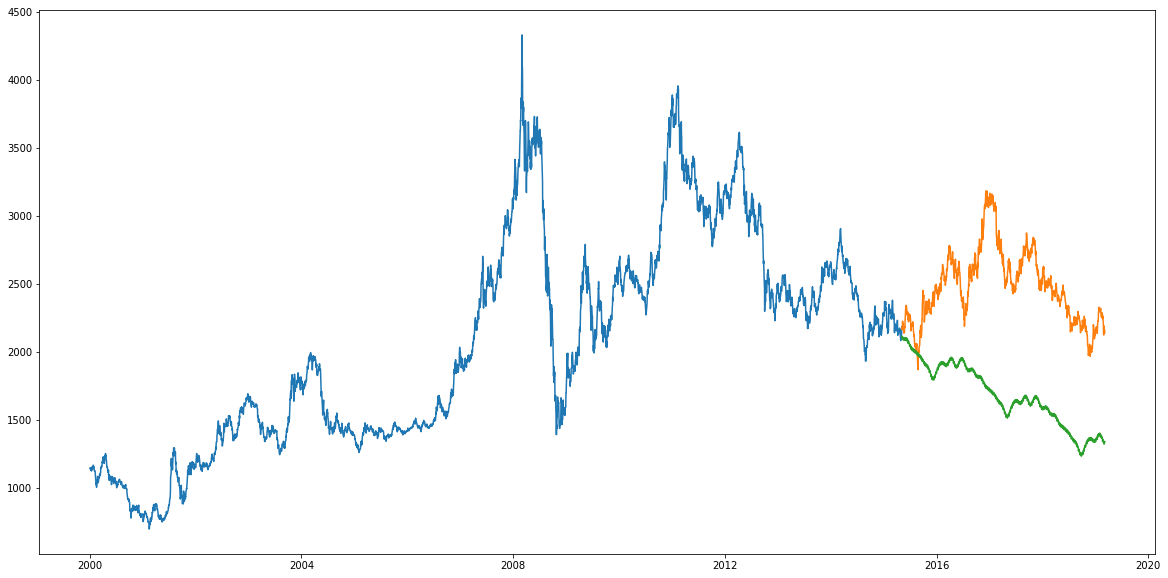

In [67]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [68]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [69]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [70]:
new_data.head()

,Date,Close
0,2000-01-04 00:00:00,1141
1,2000-01-05 00:00:00,1135
2,2000-01-06 00:00:00,1145
3,2000-01-07 00:00:00,1145
4,2000-01-10 00:00:00,1145


In [71]:
# setting index

new_data.index = new_data.Date

In [72]:
new_data.head()

,Date,Close
Date,,
2000-01-04,2000-01-04 00:00:00,1141
2000-01-05,2000-01-05 00:00:00,1135
2000-01-06,2000-01-06 00:00:00,1145
2000-01-07,2000-01-07 00:00:00,1145
2000-01-10,2000-01-10 00:00:00,1145


In [73]:
new_data.drop('Date', axis=1, inplace=True)

In [74]:
new_data.head()

,Close
Date,
2000-01-04,1141
2000-01-05,1135
2000-01-06,1145
2000-01-07,1145
2000-01-10,1145


In [75]:
#creating train and test sets
dataset = new_data.values

In [76]:
dataset

array([[1141],
       [1135],
       [1145],
       ...,
       [2160],
       [2157],
       [2139]], dtype=object)

In [77]:
train = dataset[0:4002,:]
valid = dataset[4002:,:]

In [78]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [79]:
scaled_data

array([[0.12293729],
       [0.12128713],
       [0.1240374 ],
       ...,
       [0.40319032],
       [0.40236524],
       [0.39741474]])

In [80]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    print(x_train)

    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [81]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Epoch 1/1
 - 390s - loss: 0.0010


In [82]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

70.11757732688113

C:\Users\sushil.dubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



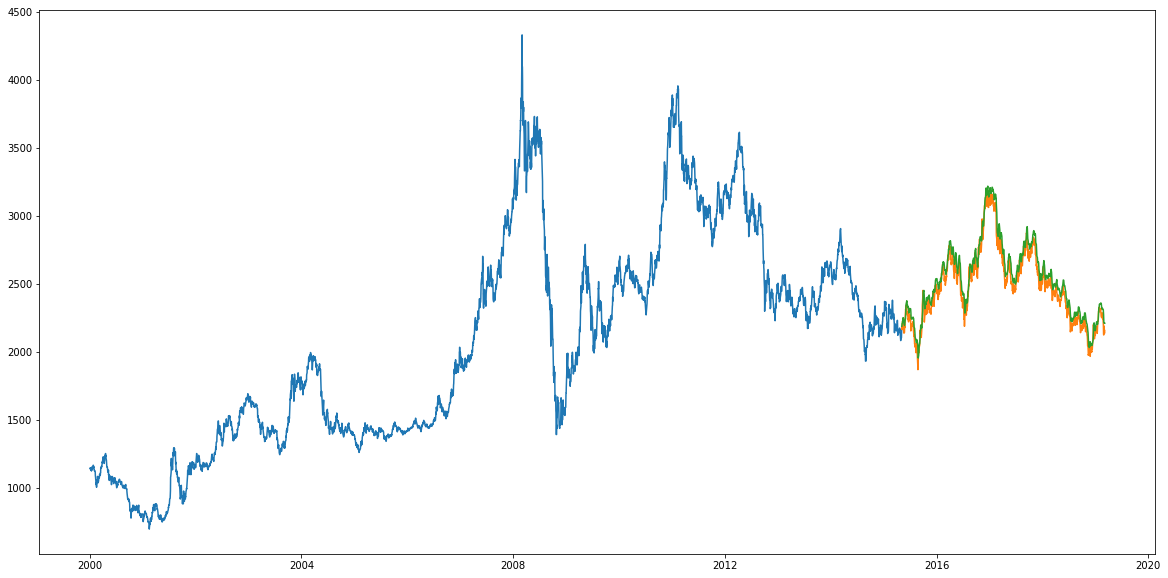

In [83]:
#for plotting
train = new_data[:4002]
valid = new_data[4002:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])